Кроме pytorch существуют альтернативы: Tensorflow, MXNet, Keras.

Существуют три типа фреймоворков: 
1. С фиксированным модулем (Keras) - расширяемость близка к нуля (собираешь из имеющихся)
2. Статический граф вычислений (Tensorflow) - создали свою нейросеть (кастом не настолько сложен), обучили и больше изменять нельзя 
3. Динамический граф вычислений - на каждой итерации обучения нейронки можно менять граф, где-то считается градиент где-то нет (плюс все плюсы статисческих и фиксированных)


In [71]:
import numpy as np
import torch 
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn # стандартные слои нейронок
import torch.nn.functional as F # функции активации

from sklearn.datasets import load_boston
from tqdm.notebook import tqdm


import warnings
warnings.filterwarnings('ignore')

### Повторение numpy

In [9]:
a = np.random.rand(5, 3) # создали случайную матрицу
a

array([[0.77253577, 0.02267167, 0.79432019],
       [0.31924496, 0.22019336, 0.00439472],
       [0.71299293, 0.48525016, 0.36078269],
       [0.0695266 , 0.40099632, 0.97508593],
       [0.55081808, 0.52858347, 0.16927631]])

In [10]:
a @ a.T

array([[1.22827009, 0.25511112, 0.84839095, 0.83733349, 0.57197013],
       [0.25511112, 0.15042177, 0.3360538 , 0.11477797, 0.29298038],
       [0.84839095, 0.3360538 , 0.87399079, 0.59594963, 0.71029657],
       [0.83733349, 0.11477797, 0.59594963, 1.11642458, 0.41531548],
       [0.57197013, 0.29298038, 0.71029657, 0.41531548, 0.61145551]])

In [13]:
np.dot(a, a.T), np.dot(a.T, a)

(array([[1.22827009, 0.25511112, 0.84839095, 0.83733349, 0.57197013],
        [0.25511112, 0.15042177, 0.3360538 , 0.11477797, 0.29298038],
        [0.84839095, 0.3360538 , 0.87399079, 0.59594963, 0.71029657],
        [0.83733349, 0.11477797, 0.59594963, 1.11642458, 0.41531548],
        [0.57197013, 0.29298038, 0.71029657, 0.41531548, 0.61145551]]),
 array([[1.51532229, 0.75282347, 1.03331412],
        [0.75282347, 0.72466537, 0.67452865],
        [1.03331412, 0.67452865, 1.74057507]]))

In [22]:
print(f"Среднее по колонкам {a.mean(axis = -1 )}")

Среднее по колонкам [0.52984255 0.18127768 0.51967526 0.48186962 0.41622595]


In [17]:
print(f"Изменить размеры {a.reshape(-1, 5).shape}")

Изменить размеры (3, 5)


In [ ]:
# Сумма квадратов от 1 до 10000
np.sum(np.arange(1, 10001) ^ 2)

### Pytorch

Аналогично numpy, только объекты здесь это тензоры

In [23]:
x = torch.rand(5, 3)
x

tensor([[0.9433, 0.2186, 0.7462],
        [0.4543, 0.1301, 0.3394],
        [0.9968, 0.7752, 0.9358],
        [0.0968, 0.1067, 0.1937],
        [0.8192, 0.5962, 0.3992]])

In [25]:
print(x.shape)

torch.Size([5, 3])


In [31]:
torch.matmul(x, x.transpose(1, 0))
x.mm(x.t())
x @ x.t()

tensor([[1.4944, 0.7102, 1.8080, 0.2592, 1.2009],
        [0.7102, 0.3384, 0.8712, 0.1236, 0.5852],
        [1.8080, 0.8712, 2.4702, 0.3605, 1.6523],
        [0.2592, 0.1236, 0.3605, 0.0583, 0.2203],
        [1.2009, 0.5852, 1.6523, 0.2203, 1.1858]])

In [33]:
print(f"Mean of columns: {x.mean(dim = -1)}")

Mean of columns: tensor([0.6360, 0.3079, 0.9026, 0.1324, 0.6049])


In [37]:
print(f"Reshape {x.view([3, 5]).shape}")
print(f"Reshape {x.view([-1, 5]).shape}")

Reshape torch.Size([3, 5])
Reshape torch.Size([3, 5])


In [39]:
sum(torch.arange(1, 10001) ** 2).item()

333383335000

In [42]:
x = torch.empty(5, 3)
x
x = torch.empty([5, 3])
x

tensor([[9.2755e-39, 9.1837e-39, 9.3674e-39],
        [1.0745e-38, 1.0653e-38, 9.5510e-39],
        [1.0561e-38, 1.0194e-38, 1.1112e-38],
        [1.0561e-38, 9.9184e-39, 1.0653e-38],
        [4.1327e-39, 1.0194e-38, 1.0469e-38]])

In [45]:
torch.zeros(5, 3, dtype=torch.long)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [53]:
y = x.new_ones(5, 3, dtype = torch.double)
y

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [49]:
x = torch.randn_like(x)
x

tensor([[-0.8456, -0.6649,  1.5252],
        [-1.3996,  0.9437, -0.0081],
        [ 0.8246,  1.6463, -2.7951],
        [-0.6780,  0.4917,  0.3252],
        [-1.0227, -1.0819, -1.0391]], dtype=torch.float64)

In [56]:
z = torch.add(x, y)
z

tensor([[ 0.1544,  0.3351,  2.5252],
        [-0.3996,  1.9437,  0.9919],
        [ 1.8246,  2.6463, -1.7951],
        [ 0.3220,  1.4917,  1.3252],
        [-0.0227, -0.0819, -0.0391]], dtype=torch.float64)

In [57]:
torch.add(x, y, out = z)
print(z)

tensor([[ 0.1544,  0.3351,  2.5252],
        [-0.3996,  1.9437,  0.9919],
        [ 1.8246,  2.6463, -1.7951],
        [ 0.3220,  1.4917,  1.3252],
        [-0.0227, -0.0819, -0.0391]], dtype=torch.float64)


In [58]:
print(x * y) # поэлементнои

tensor([[-0.8456, -0.6649,  1.5252],
        [-1.3996,  0.9437, -0.0081],
        [ 0.8246,  1.6463, -2.7951],
        [-0.6780,  0.4917,  0.3252],
        [-1.0227, -1.0819, -1.0391]], dtype=torch.float64)


In [59]:
print(x @ y.t())

tensor([[ 0.0146,  0.0146,  0.0146,  0.0146,  0.0146],
        [-0.4641, -0.4641, -0.4641, -0.4641, -0.4641],
        [-0.3242, -0.3242, -0.3242, -0.3242, -0.3242],
        [ 0.1388,  0.1388,  0.1388,  0.1388,  0.1388],
        [-3.1436, -3.1436, -3.1436, -3.1436, -3.1436]], dtype=torch.float64)


In [62]:
# Добавление фиктивных размерностей 
print(x.unsqueeze(0).shape)
print(x.unsqueeze(0).squeeze(0).shape)

torch.Size([1, 5, 3])
torch.Size([5, 3])


In [69]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
print(np.allclose(x.numpy(), a)) # np.allclose == одинаковые

True


Работаем с градиентами руками

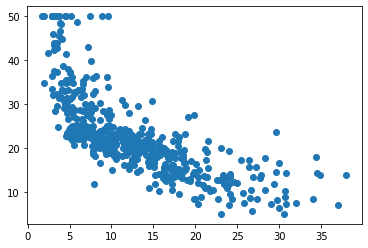

In [74]:
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target);

In [91]:
w = torch.rand(1, requires_grad=True)
w_2 = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)


x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype = torch.float32)
y = torch.tensor(boston.target, dtype = torch.float32)

assert w.grad is None
assert b.grad is None

In [92]:
y_pred = w * x + b
loss = torch.mean((y_pred - y) ** 2)
loss.backward()
assert w.grad is not None
assert b.grad is not None
print(f"dL/df = {w.grad}")
print(f"dL/db = {b.grad}")

dL/df = tensor([-11.8745])
dL/db = tensor([-43.2798])


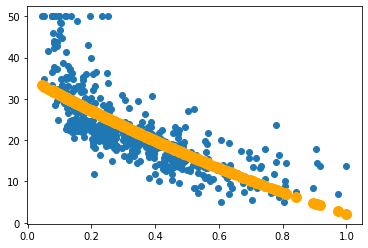

loss = 36.485107421875


In [100]:
from IPython.display import clear_output

lr = 0.25
w.grad.data.zero_()
b.grad.data.zero_()
w_2.grad.data.zero_()
for i in range(100):
    y_pred = w * x + b + w_2 * x ** 2 
    loss = torch.mean((y_pred - y) ** 2)
    loss.backward()
    
    w.data = w.data - w.grad * lr
    b.data = b.data - b.grad * lr
    w_2.data = w_2.data - w_2.grad * lr

    w.grad.data.zero_()
    w_2.grad.data.zero_()
    b.grad.data.zero_()

    if (i + 1)%5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(), color = "orange", linewidth=5)
        plt.show()
        print(f"loss = {loss.data.numpy()}") 

Чтобы написать нейросеть нужно освоить 3 вещи: 
1. Как формировать батчи и пихать их в сетку
2. Как сделать сетку
3. Как написать цикл обучения и отслеживать метрики


### Формирование батчей

Для того чтобы наш фреймворк подходил для батчей, необходимо создать специальный класс (унаследованный от torch.utils.data.Dataset)


In [123]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {"sample": torch.tensor(x[idx, :], dtype=torch.float), "target": y[idx]}

In [125]:
x = np.random.rand(1000, 5)
y=  np.random.rand(1000)

In [126]:
our_dataset = RandomDataset(x, y)
our_dataset[1]

{'sample': tensor([0.1671, 0.5703, 0.2387, 0.3862, 0.5071]),
 'target': 0.6671790598403522}

In [127]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

In [128]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.2319, 0.8733, 0.0150, 0.2286, 0.4814],
        [0.1671, 0.5703, 0.2387, 0.3862, 0.5071],
        [0.9030, 0.7096, 0.4413, 0.0211, 0.7292],
        [0.5891, 0.7373, 0.2479, 0.4238, 0.5216]])
Target:
tensor([0.7223, 0.6672, 0.3747, 0.7532], dtype=torch.float64)


### Как сделать сетку

Можно задавать сетку через класс, а можно так:

In [129]:
model = nn.Sequential()
model.add_module("l1", nn.Linear(5, 3))
model.add_module("l2", nn.ReLU())
model.add_module('l3', nn.Linear(3, 1))

In [133]:
y_pred = model(batch["sample"])

In [135]:
y_pred

tensor([[0.2632],
        [0.2363],
        [0.2760],
        [0.2474]], grad_fn=<AddmmBackward0>)